<h1><b>Statistique en Bioinformatique : </b> TME3 </h1>
<br>
L’objectif de ce TME est: 
<br>
<ul>
<li> objectif 1: comprendre les principaux étapes de BLAST et PSIBLAST, </li>
<li> objectif 2: comprendre et comparer les algorithmes d'alignement progressif </li>
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renommer le fichier TME3_subject_st.ipynb pour NomEtudiant1_NomEtudiant3.ipynb </li>
<li>Soumettre via Moodle</li>
</ul>
</div>


Nom etudiant 1 :
Alexis Trang

Nom etudiant 2 :
Yann Zhong

<h3>Section 1: BLAST</h3>

<b> Exercice 1 </b>: À partir de l'application BLAST, disponible via le site de <a href="http://blast.ncbi.nlm.nih.gov/">NCBI</a>, cliquez sur protein Blast. Faites un BLAST de la séquence fasta/seq1.fasta. Expliquez le résultat graphique, la couleur de chaque hit et expliquez le tableau de résultats : qu'est-ce que c'est chaque colonne?
<br>


In [2]:
fichier = open("fasta/seq1.fasta","r")
for i in fichier:
    pass
    # print(i)

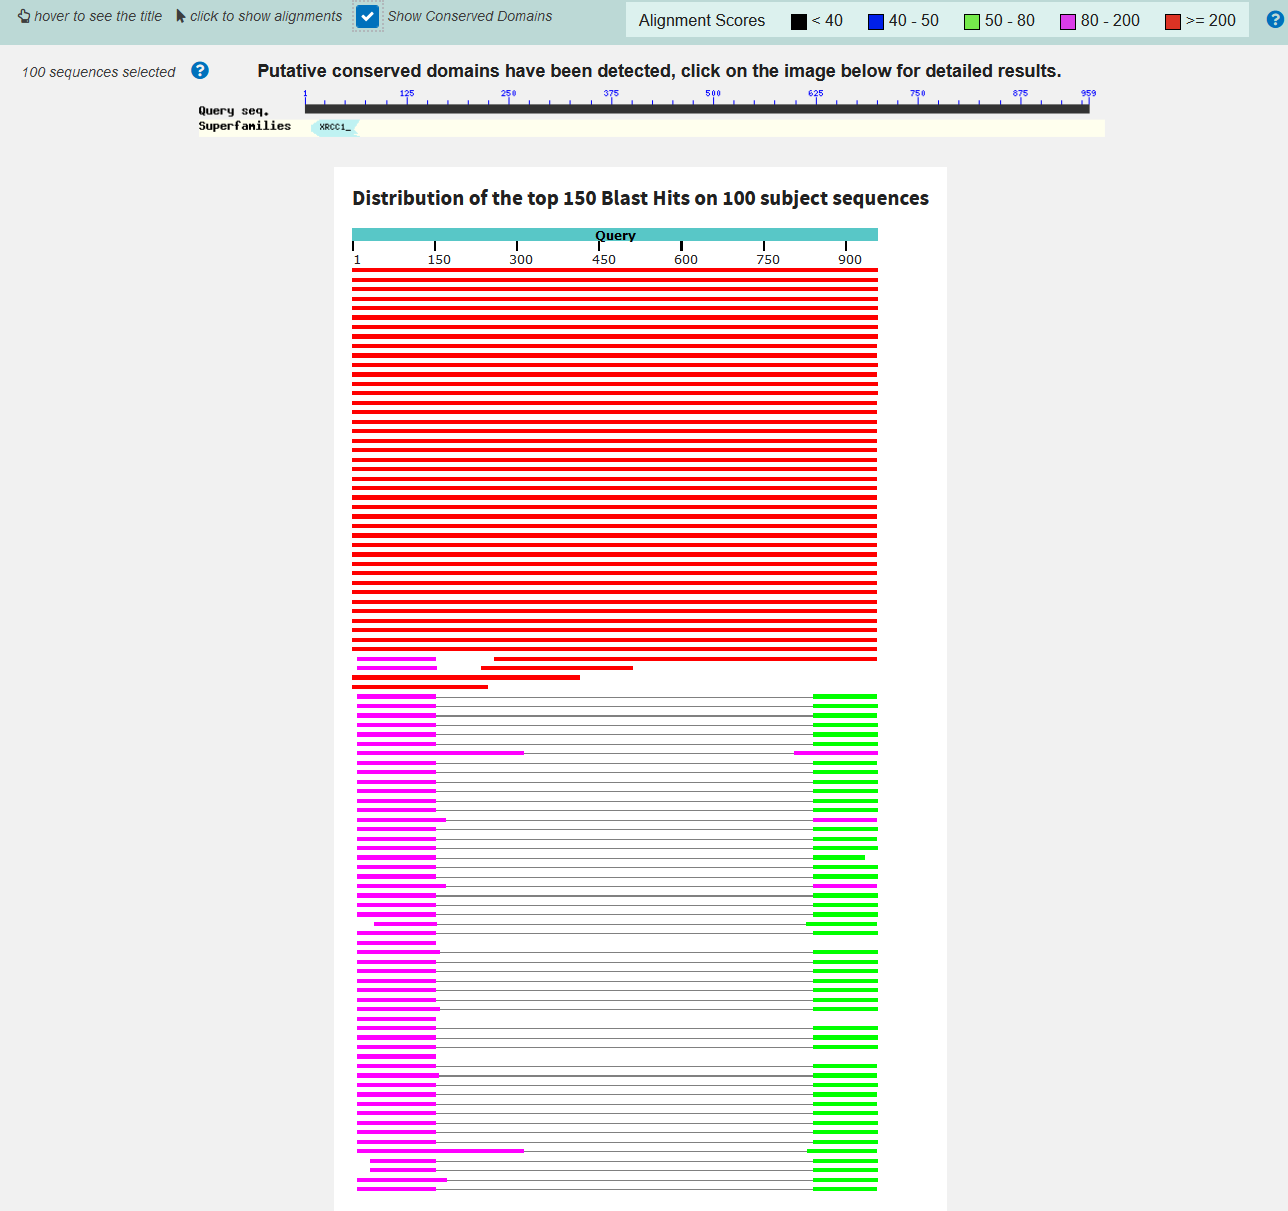

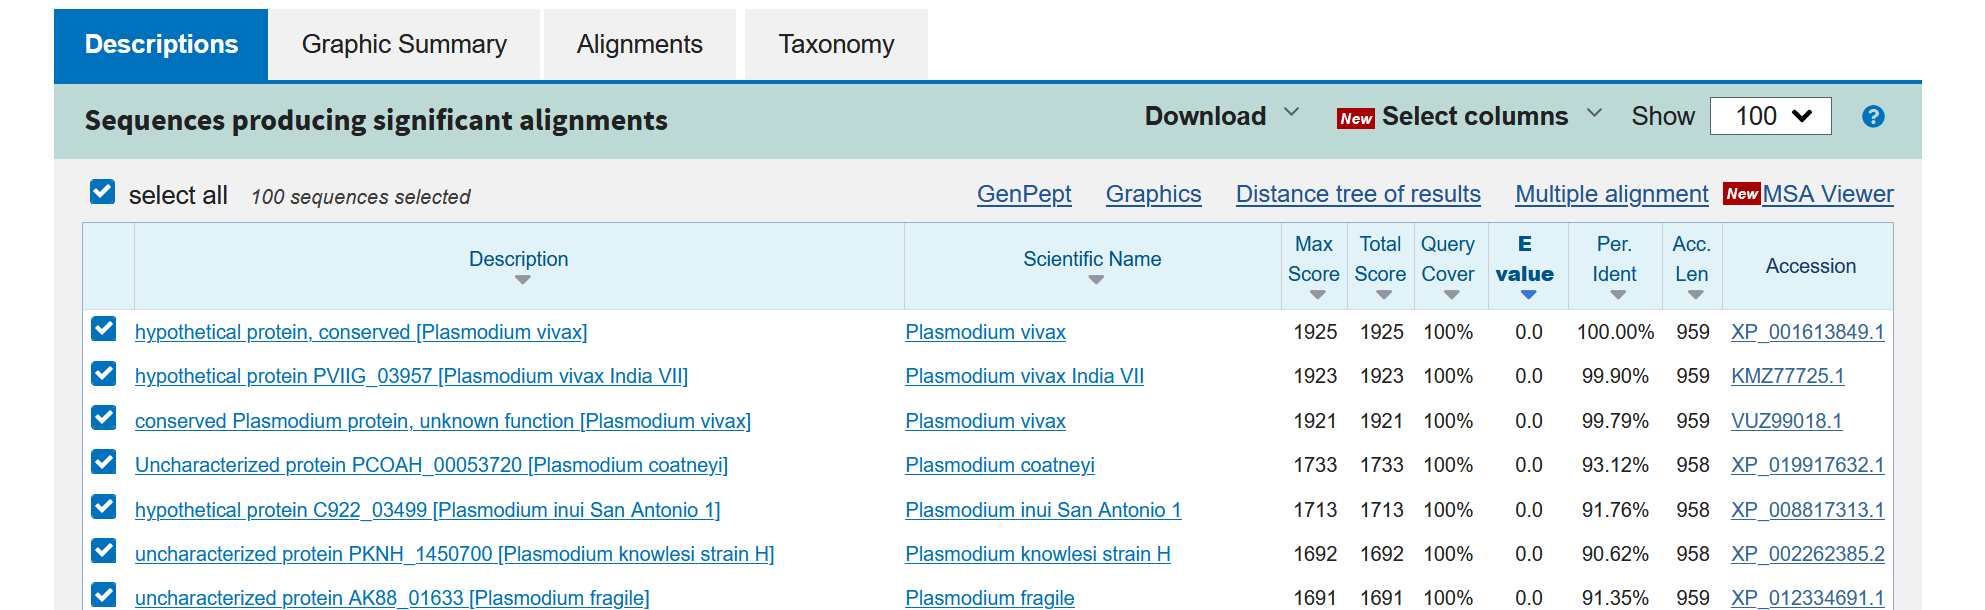

 Réponse : On voit au résultat du BLAST qu'on est en présence d'un grand nombre de "hits" à un score >= 200. Pour notre séquence d'entrée de 959 acides aminés, on trouve environ une trentaine de séquences qui nous retournent un score élevé supérieur à 200, avec en plus la plupart de ces séquences s'alignant complètement avec la séquence d'entrée.
 
 Les couleurs sont indicatrices du score de similarité de la région et se calcule le plus souvent à partir d'une PSSM. Le violet est un score un peu moins élevé et le vert encore un peu moins élevé mais sont néanmoins des régions avec de nombreuses similarités.
 
 Le tableau de résultats (qui n'est pas sous forme graphique) nous donne tous les détails par rapport aux séquences identifiées par BLAST. Chaque colonne du tableau après la description et le nom scientifique nous donne une valeur numérique différente: le score maximum, le score total, le pourcentage de la séquence qui a été "matchée", le E-value (le nombre de hits attendus par hasard ayant ce score ou un score plus élevé), le pourcentage d'identité (match exact), la longueur alignée, et ainsi de suite.

<b>Exercice 2</b>: On s'intéresse à présent au gène FHIT chez l'homme (fragile histidine triad protein, identifiant P49789, télécharger du site  <a href="http://www.uniprot.org/"> Uniprot </a>). La protéine de ce gène est structurellement proche des galactose-1-phosphate uridylyltransferases. Faites un BLAST de ce gène contre la base SWISSPROT. Que constatez-vous?

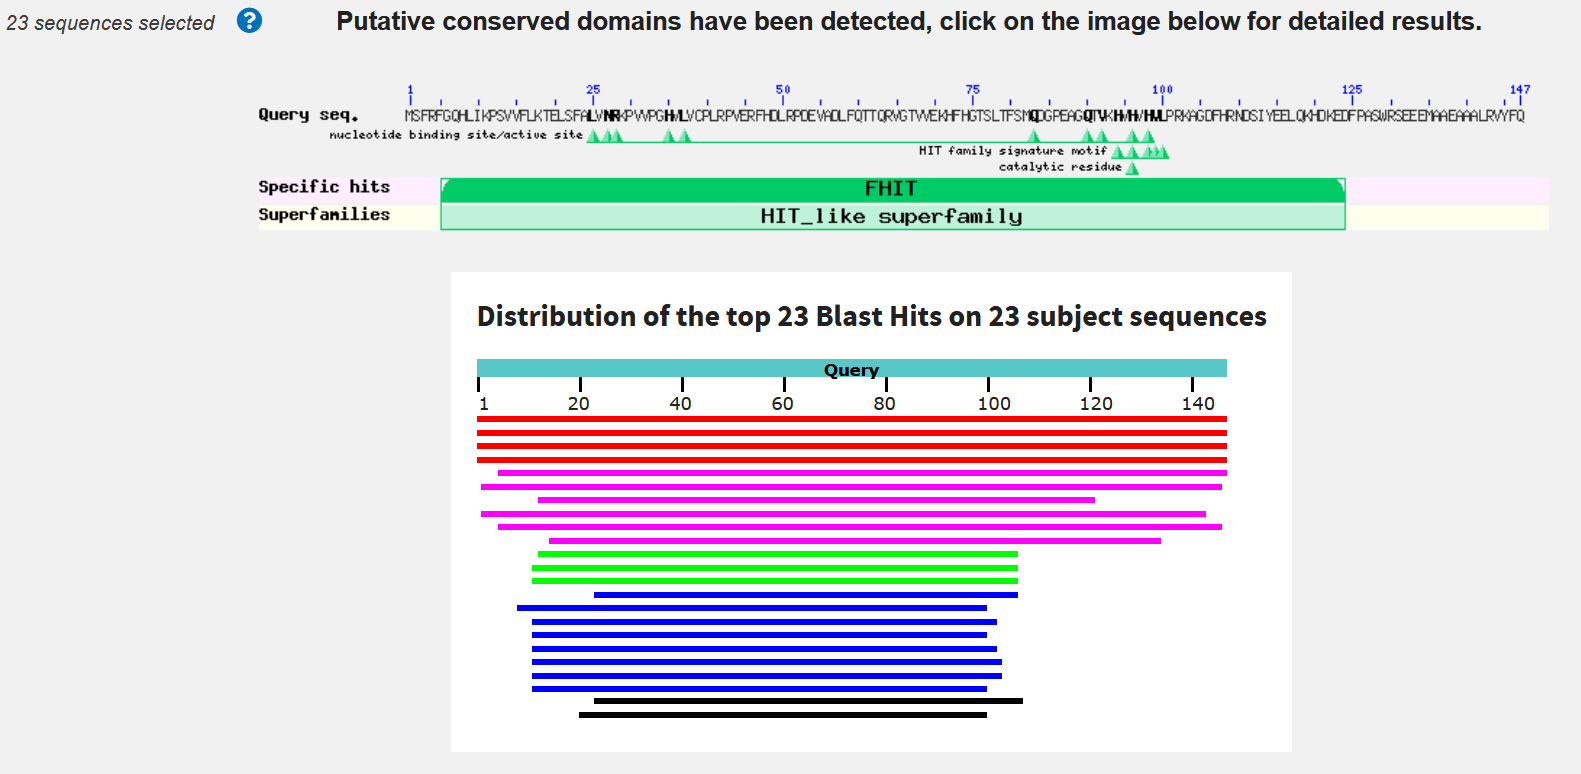

Réponse : On observe déjà beaucoup moins de séquences alignées par rapport à notre première mais 4 matchs quasi parfaits malgré tout. En regardant les espèces auxquelles les séquences appartiennent, on peut en déduire que la protéine d'entrée est possiblement commune chez les mammifères mais parfois avec un degré de différence non négligeable qui peut être observable par les couleurs changeantes (scores en baisse) et les longeurs des séquences matchées.

<b>Exercice 3</b>: Implémenter l'étape 0 de l'algorithme BLAST (indexer la base de données). Utilisez une taille de fenêtre de w=5 et les séquences du fichier database.fasta.

In [23]:
import numpy as np

#variable initiation
database = 'fasta/database.fasta'
seqTestBlast = 'fasta/test.fasta'
input_blosum_f = 'BLOSUM62.txt'

#parameters
gap = -5
w = 5


#For a simple test use:
toy_database = 'fastaToy/databaseToy.fasta'
toy_seqTestBlast = 'fastaToy/testToy.fasta'
w=3

In [24]:
#Data bank indexing
def indexing(nameFile, w):

    # Returns two dictionaries :
    # - d_seqs contains the name of the sequences as keys and the associated 
    #    sequence as value
    # - d_inds contains the sequence segments as keys (e.g. "AKC") 
    #    and a list of 2-tuples (sequence_name, start_position) as values 
    #    Example : for the sequences Seq1 = GAHAKC, Seq2 = AKCC
    #    {"AKC" : [("Seq1", 3), ("Seq2, 0)], ...}
    
    d_inds = {}
    d_seqs = {}
    
    fichier = open(nameFile,"r")
    for i in fichier:
        if i[0] == '>':
            name = i[1:-1]        # don't take > or the \n
        else:
            seq = i[:-1]
            if i[-1]!='\n':       # need to make sure we're not on the final line, otherwise it cuts off the final letter
                seq = i
            d_seqs[name] = seq    # assign value to corresponding key
            
            for j in range(len(seq)-w+1):
                if seq[j:w+j] not in d_inds:  # if the key value doesn't exist yet (hasn't been identified)
                    d_inds[seq[j:w+j]]=[(name,j)]       # ... then create it, and add the key value
                else:
                    d_inds[seq[j:w+j]].append((name,j))  # otherwise just append the key value              
    return d_inds, d_seqs   

In [45]:
# Tests on toy database
toy_database = 'fastaToy/databaseToy.fasta'

dic_1 = {}
dic_2 = {}

dic_1, dic_2 = indexing(toy_database,3)
print(dic_1)
print(dic_2)

{'agh': [('s1', 0)], 'ghr': [('s1', 1), ('s2', 2)], 'cgg': [('s2', 0), ('s3', 0)], 'ggh': [('s2', 1), ('s3', 1)], 'gha': [('s3', 2)]}
{'s1': 'aghr', 's2': 'cgghr', 's3': 'cggha'}


In [46]:
# Tests on full database
database = 'fasta/database.fasta'

dic_1 = {}
dic_2 = {}

dic_1, dic_2 = indexing(database,3)
#print(dic_1) # exceeds server load
print(dic_2)

{'Q4TC64_TETNG/9731021 ': 'KAIYNCSADHPDELTFSEGEVLVVDGEEDSDWWFGHVENESRRGVFPV', 'A1L1T9_DANRE/9681016 ': 'KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV', 'Q5TZC7_DANRE/9681016 ': 'KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV', 'Q4SWM5_TETNG/774823 ': 'KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR', 'Q4RM77_TETNG/10301079 ': 'KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR', 'C0PU06_SALSA/312360 ': 'KALYNCLADNPDELTFTEGEVIVVDGEEDQEWWKGHIEGDTRRGVFPT', 'Q8N282_HUMAN/152200 ': 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'Q53RS3_HUMAN/579627 ': 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'ASAP2_HUMAN/950998 ': 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'Q3UH27_MOUSE/944992 ': 'KALYNCVADNPDELTLSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'ASAP2_MOUSE/902950 ': 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'Q3UH05_MOUSE/902950 ': 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'Q6A074_MOUSE/914962 ': 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'Q6NRK0_XENLA/9731021 ':

In [6]:
# Just some tests to make sure my list manipulations aren't messing everything up...
 
a = [1,2,3,4,5,6]
b = a[1:]          # take everything but 1st element
c = a[:1]          # take only 1st element
d = a[-1:]         # take only last element
e = a[:-1]         # take everything but last element

print(b)
print(c)
print(d)
print(e)

[2, 3, 4, 5, 6]
[1]
[6]
[1, 2, 3, 4, 5]


<b>Exercice 4</b>: Chercher la séquence query test.fasta dans la base indexée construite precedemment, étendez l'alignement (sans gap) et de score > 12. Retournez les quatre meilleurs alignements.

In [7]:
# Read the Blosum matrix, this time as a dictionary {("A", "A") : 4, ...}
def readBlosum(nameFile):
    
    fichier = open(nameFile,'r')
    d_blosum = {}
    ligne = -1
    
    for i in fichier:
        
        if i[0]==' ':                    # when we reach the one line in BLOSUM with a space as first char
            alphabet=i.split()           # grabs every non space char from the line and puts them into a vector
        if i[0]!=" " and i[0]!="#":      # when we reach a non commented line
            ligne += 1                   # 0 on first iteration
            scores=i.split()[1:]         # grabs every score value (again, non space chars), excluding first char aka the letter
            scores=list(map(int,scores)) # converts the numerical chars to ints 
            
            for colonne in range(len(scores)):
                d_blosum[(alphabet[ligne],alphabet[colonne])] = scores[colonne] # assign dictionary values
                
    fichier.close()                      # good practice?
    
    return d_blosum

In [47]:
# Test on split function

test = " A                     R       N"
print(test)

if test[0] == ' ':
    alphabet=test.split()
    
print(alphabet)           # spaces are ignored by split

 A                     R       N
['A', 'R', 'N']


In [9]:
# Calculate the score of a perfectly matched motif (Ex: "AKC" with "AKC")
def score_motif(motif, blosum):
    
    # example motif: AKCBF as entry
    # blosum is the dictionary
    
    motif_score = 0
    
    for m in motif:
        motif_score += blosum[m,m]
    
    return motif_score

In [16]:
# Extend the alignment until its score is < ThrScore
def extendAln(seq1, seq2, pos1, pos2, motif, blosum, ThrScore):
    # pos1 (pos2) is the position where the motif starts in seq1 (seq2)
    # motif contains the sequence motif (example: "AKC")
    # This function returns the score and the extended alignment as a 2-tuple of sequences of the same length

    extseq1,extseq2 = motif,motif

    left_moves,right_moves = 0,0                    # counts every move to the left/right
    left_extreme,right_extreme = False, False       # Boolean, to check if we reached left or right extreme

    score = score_motif(motif,blosum) # run the function to get the score of our perfect match first
    #print(score)

    while score > ThrScore:           # while we're above threshold

    # Check for extremities:
        if pos1+right_moves+len(motif) == len(seq1) or pos2+right_moves+len(motif) == len(seq2):
            right_extreme = True      # right extreme flag

            #print("extreme ==>")

        if pos1-left_moves == 0 or pos2-left_moves == 0:
            left_extreme = True       # left extreme flag
            #print("extreme <==")

    # If either the left or right side of either sequence have reached extremes, it means that we can't extend
    # the HSP any further, even if the score threshold hasn't been reached
        if right_extreme == True and left_extreme == True:
            break                     # break out of loop, return score and the extended sequences
    # Can only extend right if we're not at right extreme and previous extension was not right
    # OR if we've reached a left extreme and can only go right
        if right_extreme is False and score > ThrScore:

            append_seq_1 = seq1[pos1+right_moves+len(motif)]
            append_seq_2 = seq2[pos2+right_moves+len(motif)]

            extseq1 += append_seq_1
            extseq2 += append_seq_2

            score += blosum[append_seq_1,append_seq_2]
            right_moves += 1
            #print("==>")

    # Can only extend left if we're not at left extreme and previous extension was not left
    # OR if we've reached a right extreme and can only go left
        if left_extreme is False and score > ThrScore:

            insert_seq_1 = seq1[pos1-(left_moves+1)]
            insert_seq_2 = seq2[pos2-(left_moves+1)]

            extseq1 = insert_seq_1 + extseq1
            extseq2 = insert_seq_2 + extseq2


            score += blosum[insert_seq_1,insert_seq_2]
            left_moves += 1
            #print("<==")

        # --- DEBUGGING PURPOSES --- #
        #print(score)
        #print(extseq1)
        #print(extseq2)

    return score, (extseq1, extseq2)

In [17]:
# TEST FUNCTION 1
d_blo = {}
d_blo = readBlosum("BLOSUM62.txt")

threshold = 2 # arbitrary threshold value for now for testing purposes

score = 0
extended_lists = ["",""]

score,extended_lists = extendAln("BBAKCHRN","DQFBAKCMP",1,3,"BAKC",d_blo,threshold)

print(score)
print(extended_lists)

15
('BBAKCHR', 'FBAKCMP')


In [18]:
# TEST FUNCTION 2
d_blo = {}
d_blo = readBlosum("BLOSUM62.txt")

threshold = 2 # arbitrary threshold value for now for testing purposes

score = 0
extended_lists = ["",""]

score,extended_lists = extendAln("AKCHRN","DQAKCM",0,2,"AKC",d_blo,threshold)

print(score)
print(extended_lists)

16
('AKCH', 'AKCM')


In [15]:
# Look in index and get all the motifs from a query sequence
def getAllMotifs(d_inds, query, w):
    
    d_motifs={}    #Initialisation of dictionary
    for i in range(len(query)-w+1):  
        motif=query[i:i+w]   #slicing the query sequence into w-lengthed windows
        if motif in d_inds:    
            d_motifs[motif]=d_inds[motif] #adding the window to the dictionnary if it exists in indexs
            
    return d_motifs # same format as d_inds : {"AKC" : [("Seq1", 3), ("Seq2, 0)], ...}

In [36]:
# Test function to get motifs from largest database available
d_inds,d_seqs=indexing(database,3)
d_motifs=getAllMotifs(d_inds,'TMLA',3) 

#print(d_inds) # too big to be printable
#print(d_seqs) # for reference only (look at them in notepad++ instead)
print(d_motifs)

{'TML': [('B6K4N4_SCHJY/869918 ', 20)], 'MLA': [('C4Q0W4_SCHMA/17861829 ', 23), ('A2EJW1_TRIVA/1258 ', 15), ('SH3R1_RAT/202251 ', 35), ('SH3R1_MOUSE/202251 ', 35), ('SH3R1_BOVIN/202251 ', 35), ('SH3R1_PONAB/202251 ', 35), ('SH3R1_HUMAN/202251 ', 35)]}


In [39]:
# BLAST!
# Search all motifs of a query, then extend each alignment and return the 4 longest alignments 
def blast(d_seqs, d_inds, query, blosum, w, ThrScore):
    
    best_alignments=[]  #initialisation
    posquery=0
    d_motifs=getAllMotifs(d_inds,query,w)
    
    for motif in d_motifs:     #keys in d_motifs = motifs we're going to use
        for i in range(len(d_motifs[motif])):      #go through every sequences where the motif is present
            nom,position=d_motifs[motif][i]        #nom=name of the sequence, position=start position of the motif inside the sequence
            best_alignments.append(extendAln(query,d_seqs[nom],posquery,position,motif,blosum,ThrScore)[1])
            #adding the result of extendAln
            if len(best_alignments)==5:         #When the number of alignments in best_alignments exceeds 4
                indmin=-1                       #We get rid of the smallest sequence.
                min=len(best_alignments[-1][0])
                for i in range(4):
                    if min>len(best_alignments[i][0]):
                        indmin=i
                best_alignments.pop(indmin)
        posquery+=1
    return best_alignments # list of outputs, each one as in extendAln : [(score, (seq1, seq2)), ...]

In [48]:
# Test function on very simple query

best_alignments=blast(d_seqs,d_inds,"TMLA",d_blo,3,2)
print(best_alignments)

[('TMLA', 'TMLV'), ('TMLA', 'WMLA'), ('TMLA', 'PMLA'), ('TMLA', 'GMLA')]


<h3>Section 2: PSI-BLAST</h3>
On considère à nouveau le gène FHIT chez l'homme. 
<BR>
<b> Exercice 1 </b>:
Faites un PSI-BLAST de ce gène contre la base SWISS-PROT. Utilisez un seuil pour l’évalue de 1e-6.
Que constatez-vous lors de la 1ère itération concernant les protéines de la famille des galactose-1-phosphate uridylyltransferases?


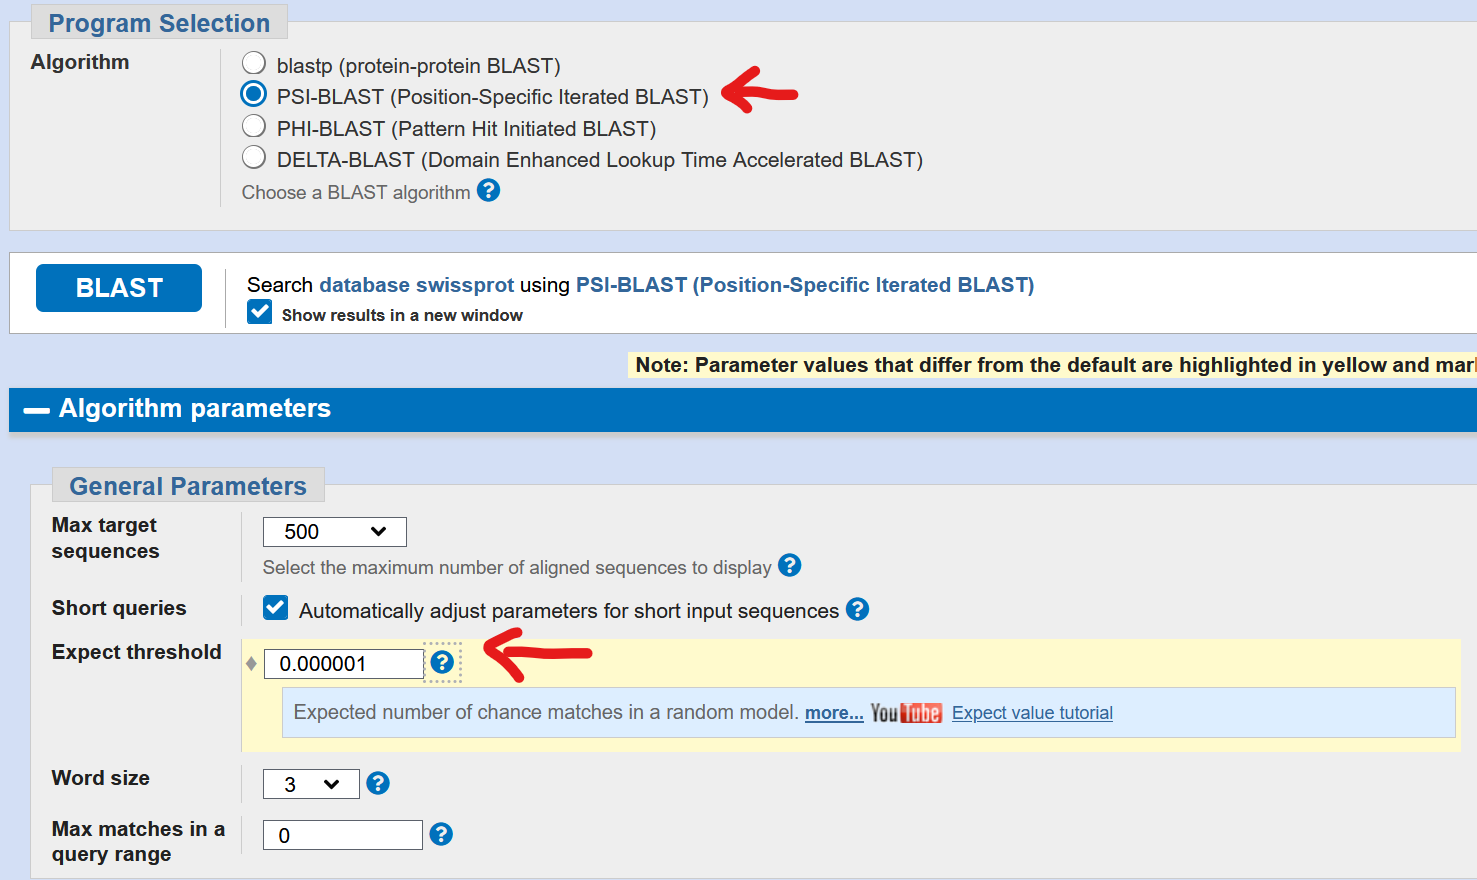

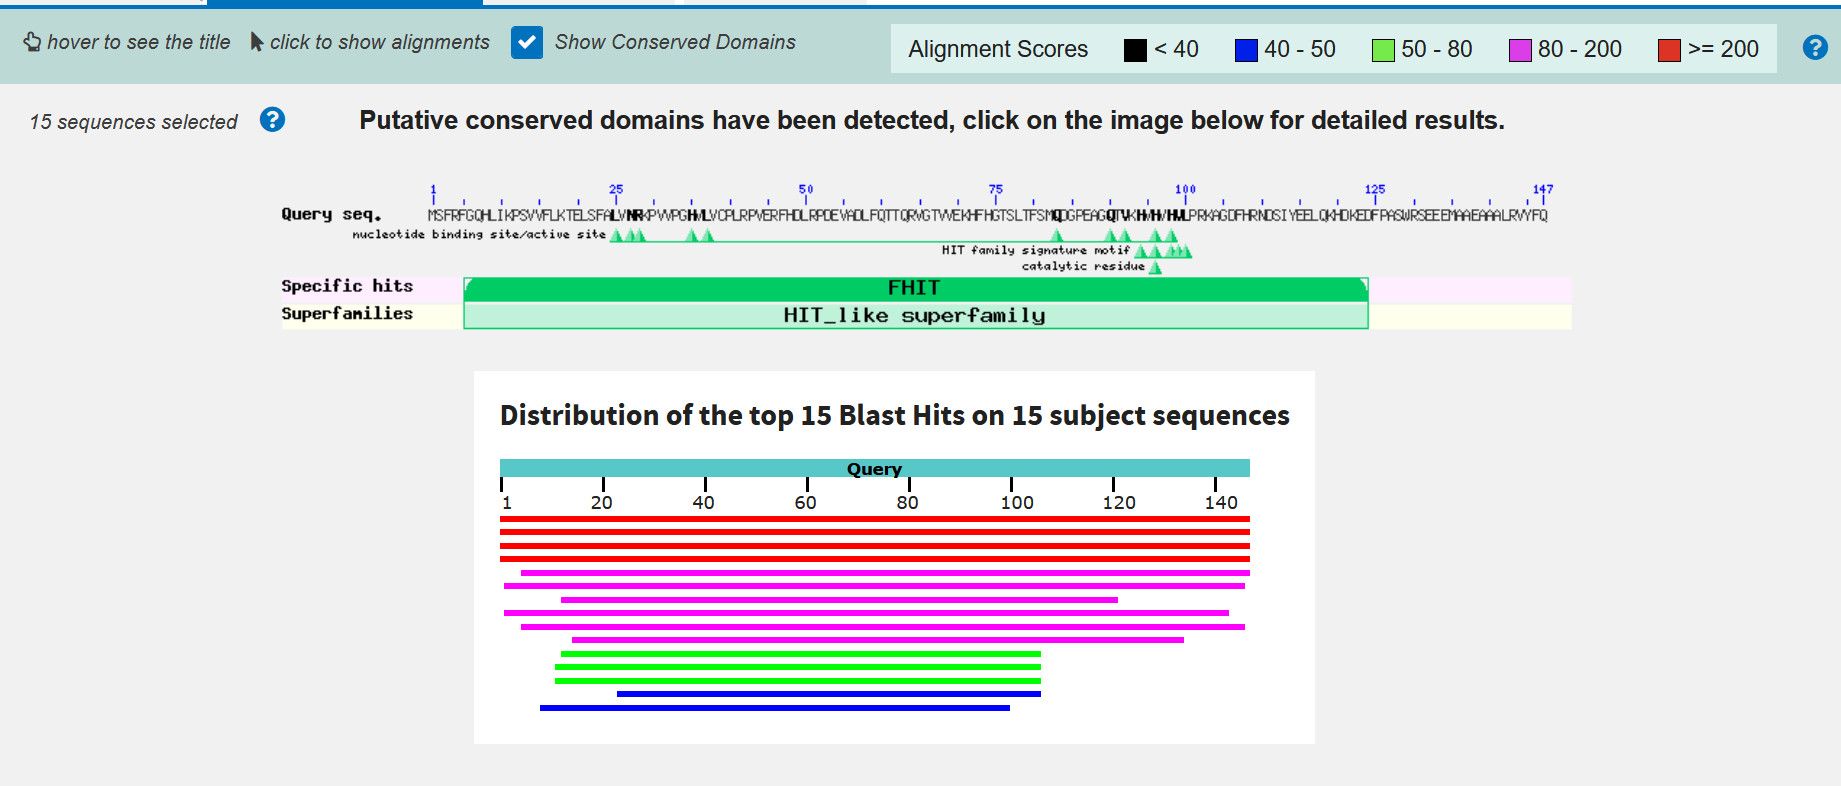

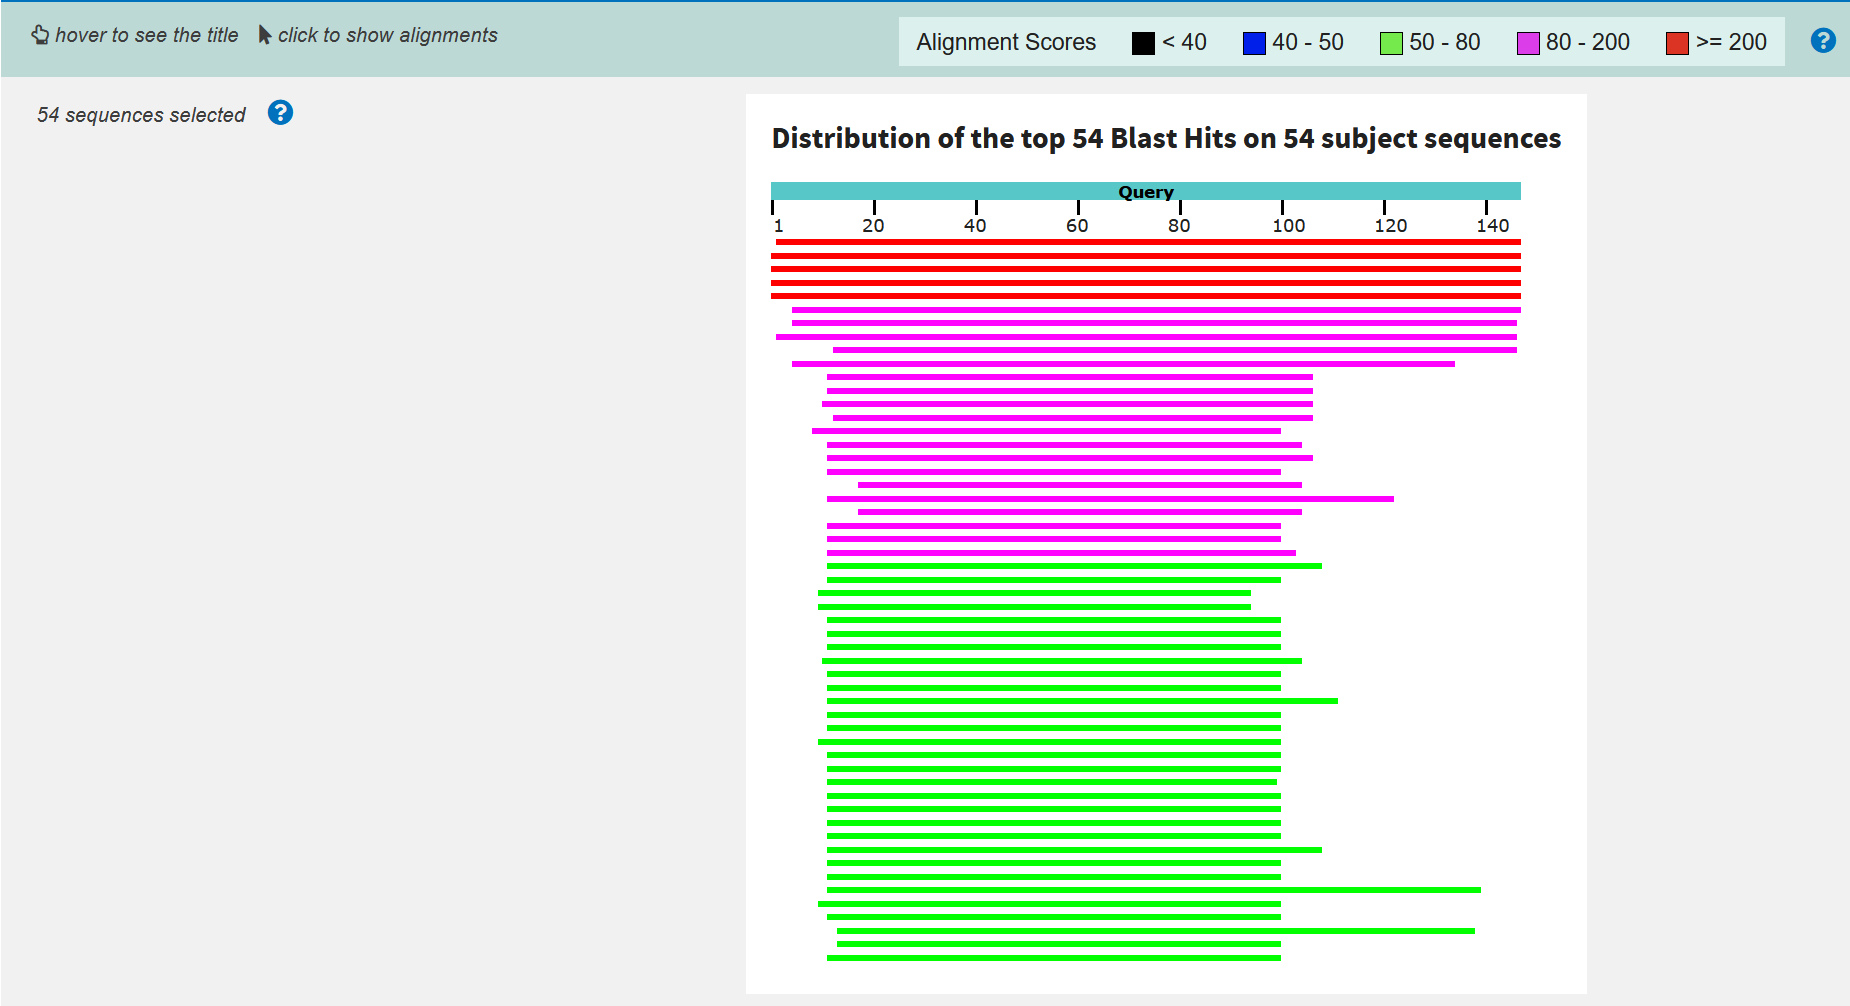

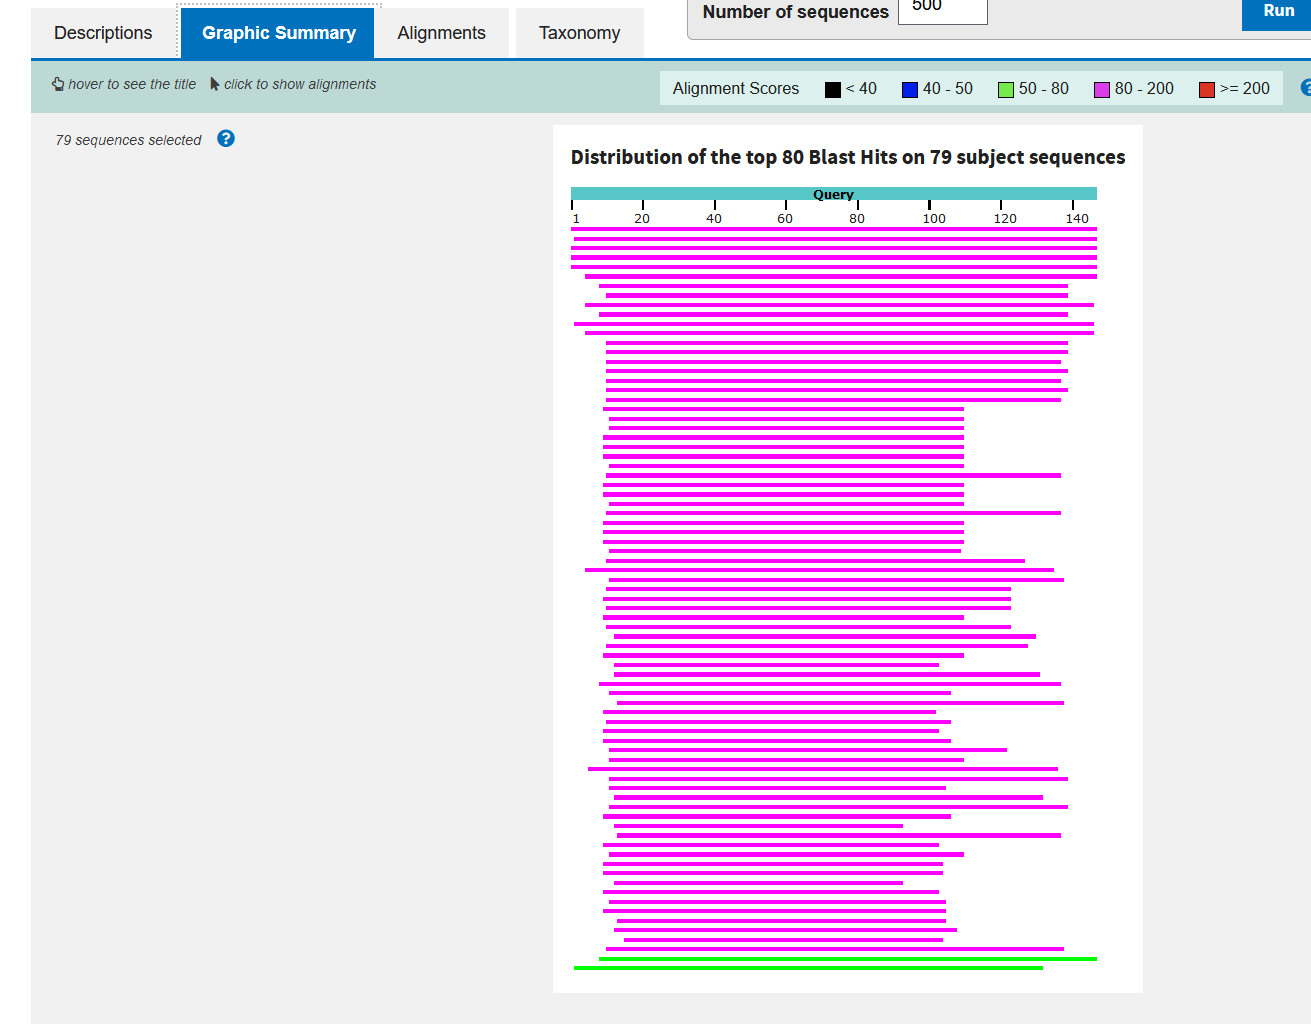

Réponse: on utilise cette séquence:

>sp|P49789|FHIT_HUMAN Bis(5'-adenosyl)-triphosphatase OS=Homo sapiens OX=9606 GN=FHIT PE=1 SV=3
MSFRFGQHLIKPSVVFLKTELSFALVNRKPVVPGHVLVCPLRPVERFHDLRPDEVADLFQTTQRVGTVVE
KHFHGTSLTFSMQDGPEAGQTVKHVHVHVLPRKAGDFHRNDSIYEELQKHDKEDFPASWRSEEEMAAEAA
ALRVYFQ

Pas de galactose dans la première itération en faisant un ctrl-f sur les alignements générés sous "alignements". (1ère image, seulement 15 alignement trouvés)

<b> Exercice 2 </b>:
Que constatez-vous lors de la 2eme itération? Lors de la 5eme itération?


Réponse:

Plus d'itérations = plus de possibilités pour de nouveaux alignements. Ainsi, on constate un rajout de 39 nouveaux alignements avec la deuxième itération (2ème image) pour un total de 54 alignements, avec toujours un manque de galactose.

A la 5eme itération, on est jusqu'à 79 alignements (3ème image) pour un total de 79 alignements, mais toujours une absence de protéines de la famille des galactose-1-phosphate uridylyltransferases... (did I get this wrong somehow? Possibly put the wrong threshold value in the settings)

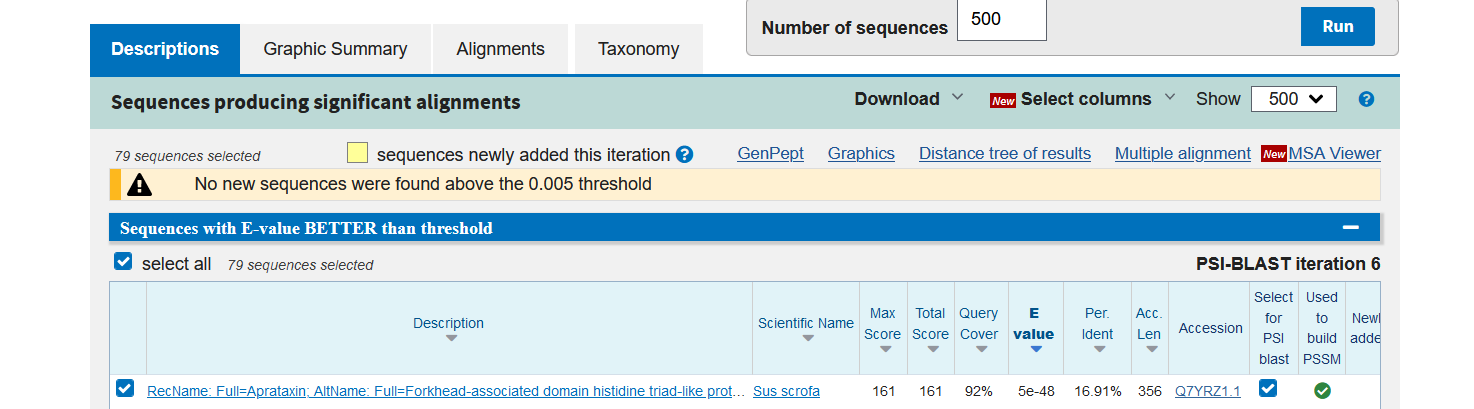

<b> Exercice 3 </b>:
À partir de quelle itération peut-on considérer qu'il y a eu une convergence de l'algorithme PSI- BLAST? Pourquoi ?

Réponse:

Comme montré sur l'image ci dessus, au delà de la 6ème itération, on a convergé car aucun nouvel alignement est trouvé (on reste sur 79), c'est à dire qu'on a recherché un maximum d'homologues lointain pour notre séquence query pour les paramètres qu'on a donnée. Cependant il parait qu'on peut changer le PSI threshold de 0.005 pour tenter de trouver de nouveaux alignements.

<b> UPDATE IF THE PREVIOUS ANSWERS ARE WRONG </b>

<h3>Section 3: Alignement Multiple</h3>


<b> Exercice 1 </b>:
Accédez à l'application <a href="http://www.ebi.ac.uk/Tools/msa/clustalo/">Clustal omega</a> et copiez les 7 séquences du fichier 7sequences.fasta. Expliquez dans quel ordre les séquences ont été alignées.

In [ ]:
CLUSTAL O(1.2.4) multiple sequence alignment


sp|P02240|LGB2_LUPLU      --------MGALTESQAALVKSSWEEFNANIPKHTHRFFILVLEIAPAAKDLFSFLKGTS	52
sp|P02185|MYG_PHYMC       ---------MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLK	51
sp|P02208|GLB5_PETMA      MPIVDTGSVAPLSAAEKTKIRSAWAPVYSTYETSGVDILVKFFTSTPAAQEFFPKFKGLT	60
sp|P69905|HBA_HUMAN       ---------MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDL--	49
sp|P01958|HBA_HORSE       ---------MVLSAADKTNVKAAWSKVGGHAGEYGAEALERMFLGFPTTKTYFPHFDL--	49
sp|P68871|HBB_HUMAN       --------MVHLTPEEKSAVTALWGKVNV--DEVGGEALGRLLVVYPWTQRFFESFGDLS	50
sp|P02062|HBB_HORSE       ---------VQLSGEEKAAVLALWDKVNE--EEVGGEALGRLLVVYPWTQRFFDSFGDLS	49
                                     *:  :   :   *  .           :  .:   * :   *  :    

sp|P02240|LGB2_LUPLU      E--VPQNNPELQAHAGKVFKLVYEAAIQLQVTGVVVTDATLKNLGSVHVSKG-VADAHFP	109
sp|P02185|MYG_PHYMC       TEAEMKASEDLKKHGVTVLTALGAILKKKGHHE--A---ELKPLAQSHATKHKIPIKYLE	106
sp|P02208|GLB5_PETMA      TADQLKKSADVRWHAERIINAVNDAVASMDDTE--KMSMKLRDLSGKHAKSFQVDPQYFK	118
sp|P69905|HBA_HUMAN       ----SHGSAQVKGHGKKVADALTNAVAHVDDMP--N---ALSALSDLHAHKLRVDPVNFK	100
sp|P01958|HBA_HORSE       ----SHGSAQVKAHGKKVGDALTLAVGHLDDLP--G---ALSNLSDLHAHKLRVDPVNFK	100
sp|P68871|HBB_HUMAN       TPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLK--G---TFATLSELHCDKLHVDPENFR	105
sp|P02062|HBB_HORSE       NPGAVMGNPKVKAHGKKVLHSFGEGVHHLDNLK--G---TFAALSELHCDKLHVDPENFR	104
                                 . .:: *.  :   .                  :  *.  *  .  :    : 

sp|P02240|LGB2_LUPLU      VVKEAILKTIKEVVGAKWSEELNSAWTIAYDELAIVIKKEMNDAA---	154
sp|P02185|MYG_PHYMC       FISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAAKYKELGYQG	154
sp|P02208|GLB5_PETMA      VLAAVIADTVAA---------GDAGFEKLMSMICILLRSAY-------	150
sp|P69905|HBA_HUMAN       LLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR------	142
sp|P01958|HBA_HORSE       LLSHCLLSTLAVHLPNDFTPAVHASLDKFLSSVSTVLTSKYR------	142
sp|P68871|HBB_HUMAN       LLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH------	147
sp|P02062|HBB_HORSE       LLGNVLVVVLARHFGKDFTPELQASYQKVVAGVANALAHKYH------	146
                          .:   :  .:            ...       .   :           

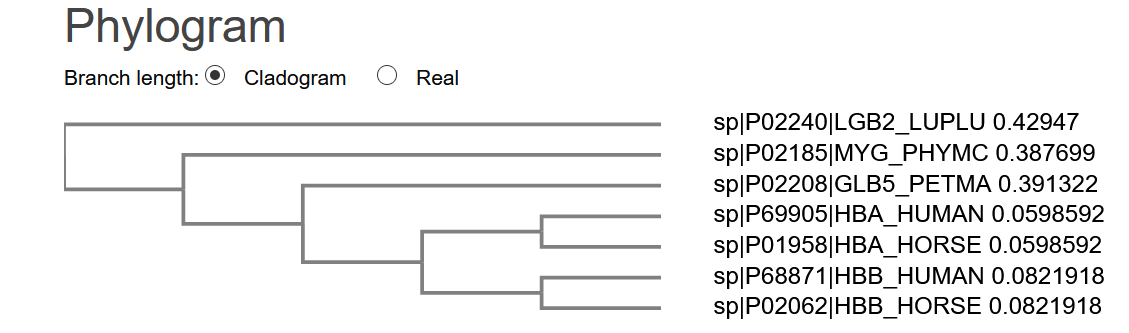

Réponse: <br>

Clustal omega est un alignement de séquences multiple et non pas par paire, donc aligne différemment qu'une méthode tel que BLAST. Clustal omega permet donc un calcul d'alignements rapides et efficaces mais moins précis et optimaux que BLAST: c'est une méthode dite heuristique.

Les alignements sont calculés à partir de matrice de distances entre chaque paire. Pour être plus précis, on calcule la matrice de distance entre toutes les paires et on construit un arbre guide pour la matrice de distance générée avec soit UPGMA, soit Neighbour Joining. Enfin, on aligne en regroupant les séquences paires par paires en suivant la construction de l'arbre.

<b> Exercice 2 </b>:
Faites une fonction pour calculer le score d’un alignement multiple. Le score de chaque position est la somme de tous les scores obtenus par BLOSUM62, et le score final est la somme des scores de chaque position divisé par la taille de l'alignement.

In [62]:
# Read fasta MSA
def read_fasta(f_input):
    fichier=open(f_input,'r')
    fichier.readline()
    sequences=[]
    flag=0
    n_seq=0
    for i in fichier:
        if flag==0 and "|" in i:
            ligne=i.split()
            sequences.append(ligne[1])
            n_seq+=1
        if i=='\n' and sequences!=[]:
            flag=1
            count=0
        if flag==1 and "|" in i:
            ligne=i.split()
            sequences[count]+=ligne[1]
            count+=1
            if count>n_seq:
                count=0            
    fichier.close()
    return sequences # As a list of strings all of the same length: ["AKGHJ", "E--LA", ...]

In [64]:
import itertools

# MSA score
def MSAscore(sequences, blosum, gap):
    score = 0
    permutations = list(itertools.permutations(range(len(sequences)), r=2))
    for i in range(len(sequences[0])):
        colonne=[]
        for col in range(len(sequences)):
            colonne.append(sequences[col][i])
        for j in permutations:
            if colonne[j[0]]!='-' and colonne[j[1]]!='-':
                score+=blosum[colonne[j[0]],colonne[j[1]]]/(2*len(sequences[0]))
            else:
                score+=gap/(2*len(sequences[0]))
    return score

<b> Exercice 3 </b>: Aligner les séquences du fichier algnMult2.fasta avec  <a href="http://www.ebi.ac.uk/Tools/msa/clustalo/">Clustal omega</a>. Utiliser la fonction développée précédemment  pour calculer le score de l'alignement. Quelle est la séquence la plus divergente? 

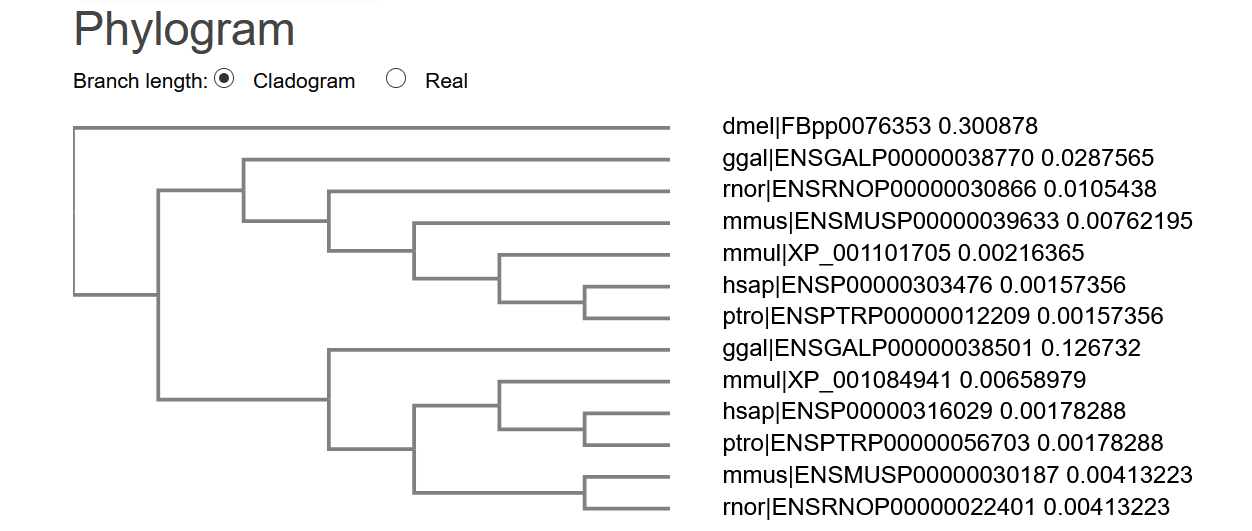

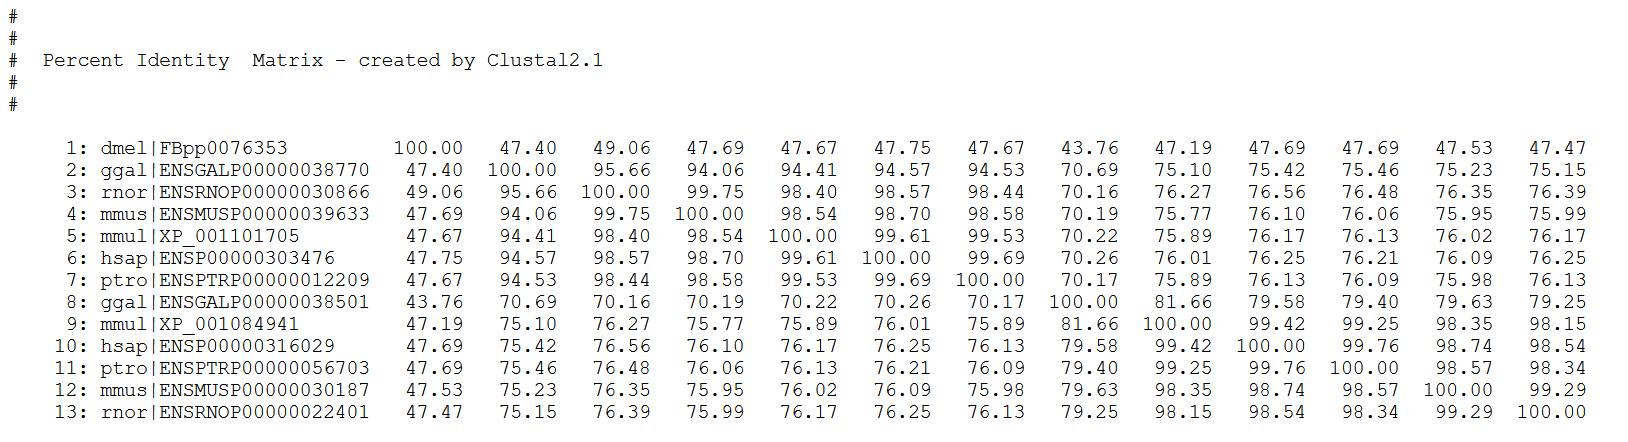

In [67]:
# Test on the second multiple alignement sequence

d_blo = {}
d_blo = readBlosum("BLOSUM62.txt")
gap = -1    # arbitrary test value for now

sequences = read_fasta("second_seq_align/clustal_omega.clustal_num")

score_align = MSAscore(sequences,d_blo,gap)
print(score_align)

248.7309679660101


Réponse:

Voir les deux images ci-dessus pour l'abre créé pour l'alignement 2 et le pourcentage d'identité entre les séquences respectives.
La fonction de calcul de score nous donne un score de 248. En regardant l'abre construit et les pourcentages d'identité, on se rend compte que la séquence la plus divergente est la dmel (pourcentages autour de 47 pour tous, et branche la plus distante sur l'arbre).

<b> Exercice 4 </b>:
Comparer les trois outils  <a href="http://www.ebi.ac.uk/Tools/msa/clustalo/">Clustal omega</a>,  <a href="http://mafft.cbrc.jp/alignment/server/">MAFT</a>  et <a href="http://www.ebi.ac.uk/Tools/msa/muscle/">Muscle</a> en utilisant les séquences du fichier algnMult.fasta. Utiliser la fonction développée precedement pour calculer le score de chaque alignement. Puis répéter la comparaison avec les séquences du fichier algnMult2.fasta. Quel outil a eu la meilleure performance?

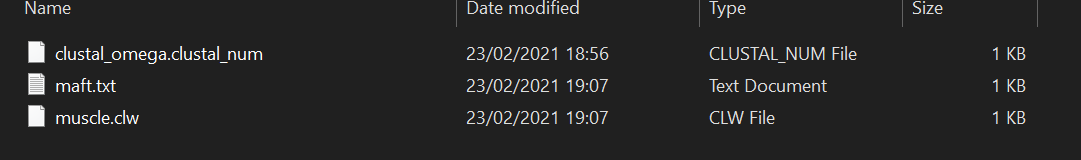

On a regroupé les trois types de résultats d'alignement dans les dossiers respectifs first_seq_align et second_seq_align comme dans l'image ci-dessus.
Pour évaluer la performance des trois méthodes d'alignement , on applique la fonction codée dans l'exercice 2 pour obtenir le score d'un alignement multiple.
Comme vu ci dessous, le meilleur score est donné (de peu) par le MUSCLE.

In [76]:
d_blo = {}
d_blo = readBlosum("BLOSUM62.txt")
gap = -1    # arbitrary test value for now

# -------------------- Clustal omega -------------------- #
co_seq_2 = read_fasta("second_seq_align/clustal_omega.clustal_num")
score_align_co_seq_2 = MSAscore(co_seq_2,d_blo,gap)

# -------------------- MAFT -------------------- #
maft_seq_2 = read_fasta("second_seq_align/maft.txt")
score_align_maft_seq_2 = MSAscore(maft_seq_2,d_blo,gap)

# -------------------- Muscle -------------------- #
mu_seq_2 = read_fasta("second_seq_align/muscle.clw")
score_align_mu_seq_2 = MSAscore(mu_seq_2,d_blo,gap)

print("Clustal Omega score for second sequence: ",score_align_co_seq_2)
print("Maft score for second sequence: ",score_align_maft_seq_2)
print("Muscle score for second sequence: ",score_align_mu_seq_2)

Clustal Omega score for second sequence:  248.7309679660101
Maft score for second sequence:  251.12923289589224
Muscle score for second sequence:  251.66447368499854
